### **Socio-Economic Determinants and Health Outcomes in India: An NFHS-5 District-Level Analysis**

*Importing required packages and libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*Importing the required file and creating a dataframe*

In [ ]:
df = pd.read_csv("analysis_ready_data.csv")

In [ ]:
print(df.columns)

Index(['District Names', 'State/UT', 'Number of Households surveyed',
       'Children_Anaemic',
       'Non-pregnant women age 15-49 years who are anaemic (<12.0 g/dl)22 (%)',
       'Pregnant women age 15-49 years who are anaemic (<11.0 g/dl)22 (%)',
       'Women_Anaemic', 'All women age 15-19 years who are anaemic22 (%) ',
       'Children_Stunted', 'Children_Wasted',
       'Children under 5 years who are severely wasted (weight-for-height)19 (%)',
       'Children_Underweight',
       'Children under 5 years who are overweight (weight-for-height)20 (%)',
       'Women (age 15-49 years) whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2)21 (%)',
       'Electricity_Access', 'Improved_Water_Source', 'Improved_Sanitation',
       'Clean_Fuel_Cooking', 'Households using iodized salt (%)',
       'Households with any usual member covered under a health insurance/financing scheme (%)',
       'Children age 5 years who attended pre-primary school during the school year 2019-20

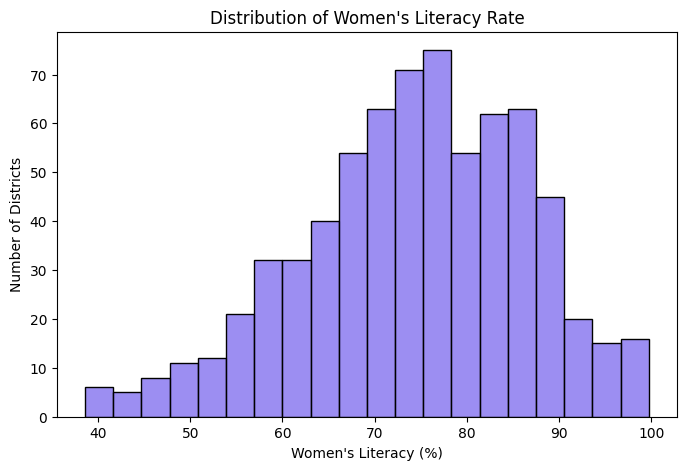

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Women_Literacy'].dropna(), bins=20, color='mediumslateblue')
plt.title("Distribution of Women's Literacy Rate")
plt.xlabel("Women's Literacy (%)")
plt.ylabel("Number of Districts")
plt.show()

/tmp/ipython-input-7-3229575800.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='State/UT', y='Children_Anaemic', data=tmp, palette="Set3")


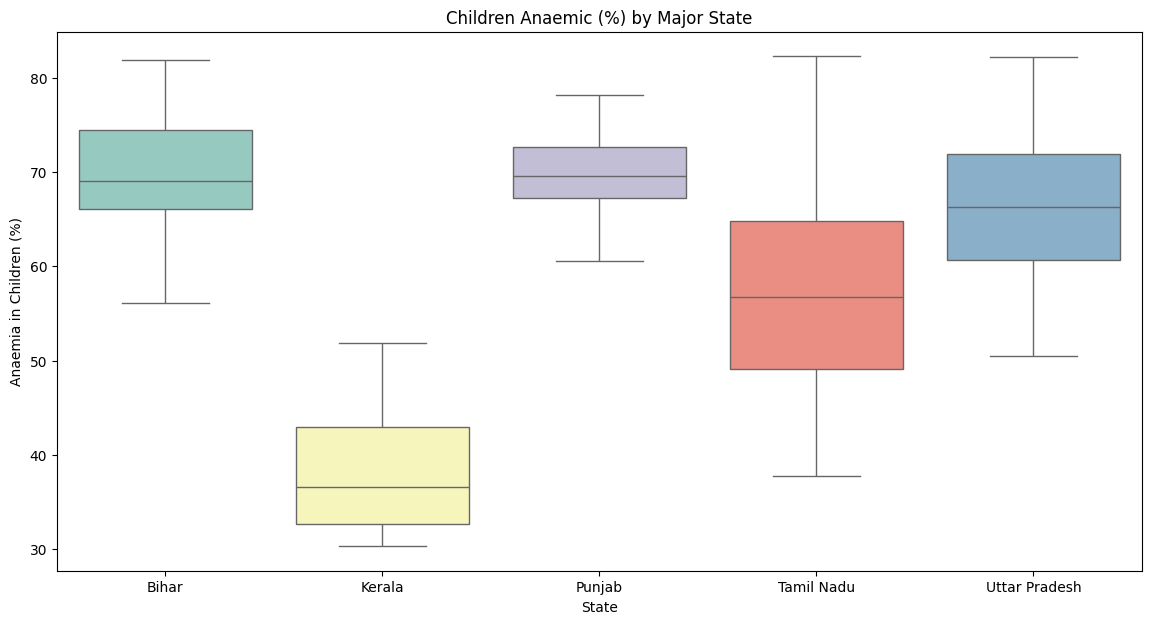

In [ ]:
plt.figure(figsize=(14,7))
major_states = ['Bihar', 'Kerala', 'Punjab', 'Tamil Nadu', 'Uttar Pradesh']
tmp = df[df['State/UT'].isin(major_states)]
sns.boxplot(x='State/UT', y='Children_Anaemic', data=tmp, palette="Set3")
plt.title("Children Anaemic (%) by Major State")
plt.xlabel("State")
plt.ylabel("Anaemia in Children (%)")
plt.show()

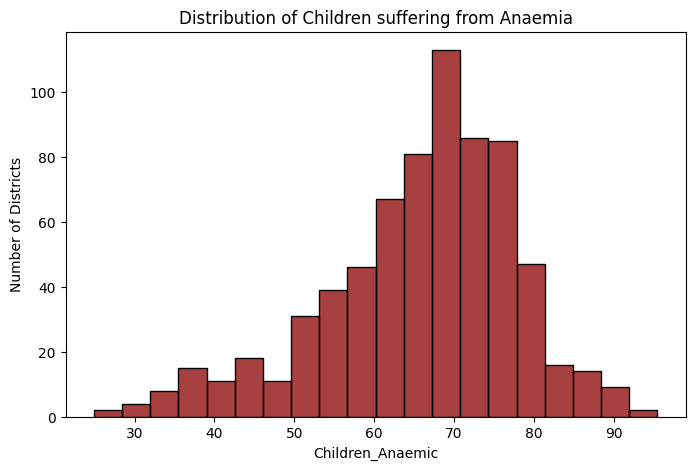

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Children_Anaemic'].dropna(), bins=20, color='DARKRED')
plt.title("Distribution of Children suffering from Anaemia")
plt.xlabel("Children_Anaemic")
plt.ylabel("Number of Districts")
plt.show()


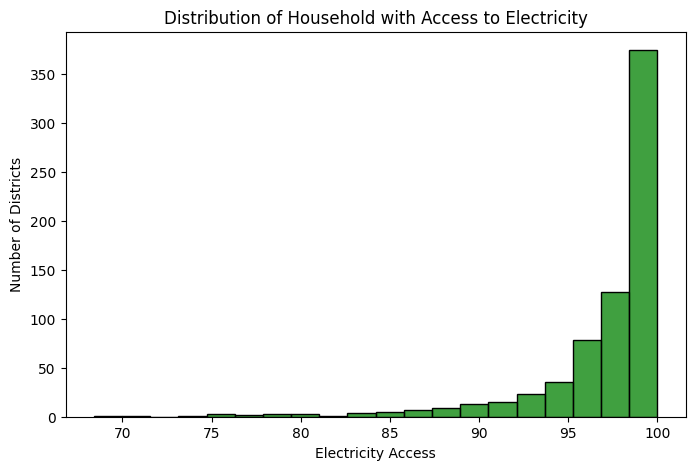

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Electricity_Access'].dropna(), bins=20, color='green')
plt.title("Distribution of Household with Access to Electricity")
plt.xlabel("Electricity Access")
plt.ylabel("Number of Districts")
plt.show()


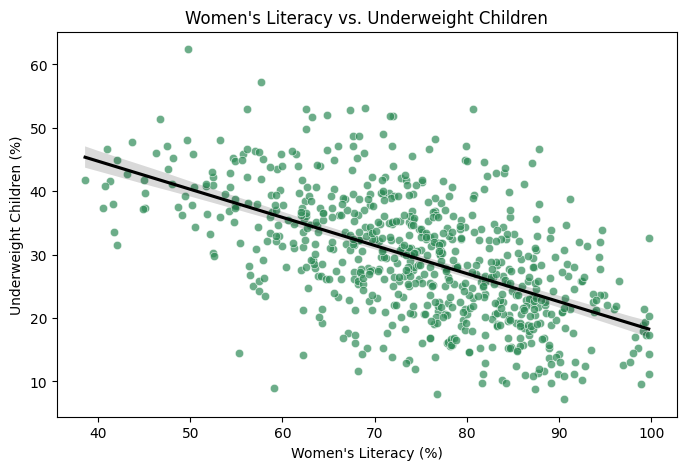

In [ ]:
#Scatterplot Relation for Women's Literacy vs Underweight Children
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Women_Literacy',
    y='Children_Underweight',
    data=df,
    color='seagreen',
    alpha=0.7
)
sns.regplot(
    x='Women_Literacy',
    y='Children_Underweight',
    data=df,
    scatter=False,
    color='black'
)
plt.title("Women's Literacy vs. Underweight Children")
plt.xlabel("Women's Literacy (%)")
plt.ylabel("Underweight Children (%)")
plt.show()


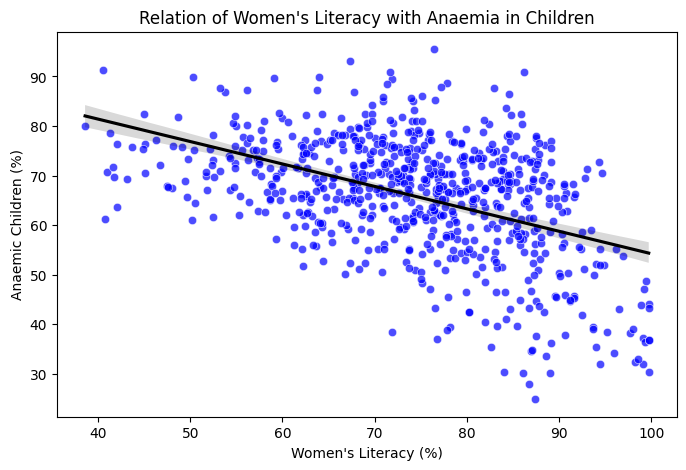

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Women_Literacy',
    y='Children_Anaemic',
    data=df,
    color='Blue',
    alpha=0.7
)
sns.regplot(
    x='Women_Literacy',
    y='Children_Anaemic',
    data=df,
    scatter=False,
    color='black'
)
plt.title("Relation of Women's Literacy with Anaemia in Children")
plt.xlabel("Women's Literacy (%)")
plt.ylabel("Anaemic Children (%)")
plt.show()


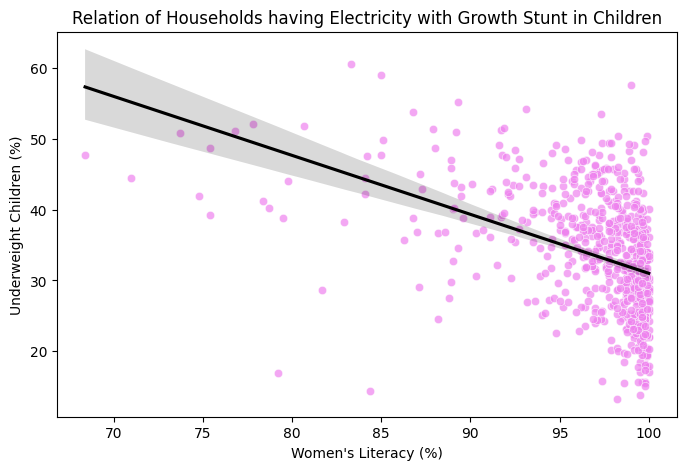

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Electricity_Access',
    y='Children_Stunted',
    data=df,
    color='violet',
    alpha=0.7
)
sns.regplot(
    x='Electricity_Access',
    y='Children_Stunted',
    data=df,
    scatter=False,
    color='black'
)
plt.title("Relation of Households having Electricity with Growth Stunt in Children")
plt.xlabel("Women's Literacy (%)")
plt.ylabel("Underweight Children (%)")
plt.show()

/tmp/ipython-input-18-915612246.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


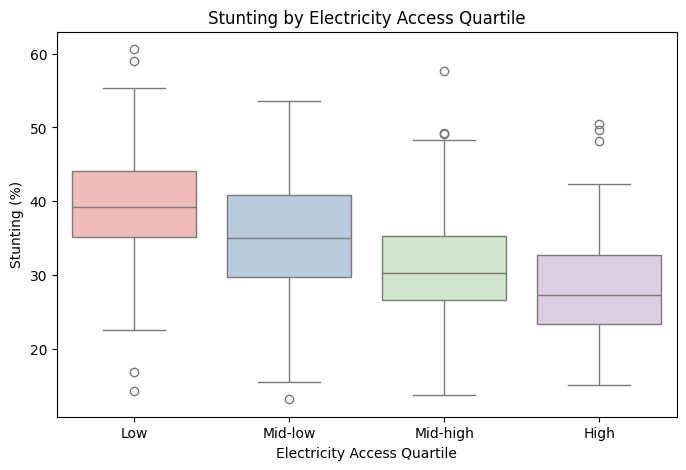

In [ ]:
df['Electricity_Quartile'] = pd.qcut(df['Electricity_Access'], 4, labels=['Low', 'Mid-low', 'Mid-high', 'High'])

plt.figure(figsize=(8,5))
sns.boxplot(
    x='Electricity_Quartile',
    y='Children_Stunted',
    data=df,
    palette='Pastel1'
)
plt.title("Stunting by Electricity Access Quartile")
plt.xlabel("Electricity Access Quartile")
plt.ylabel("Stunting (%)")
plt.show()

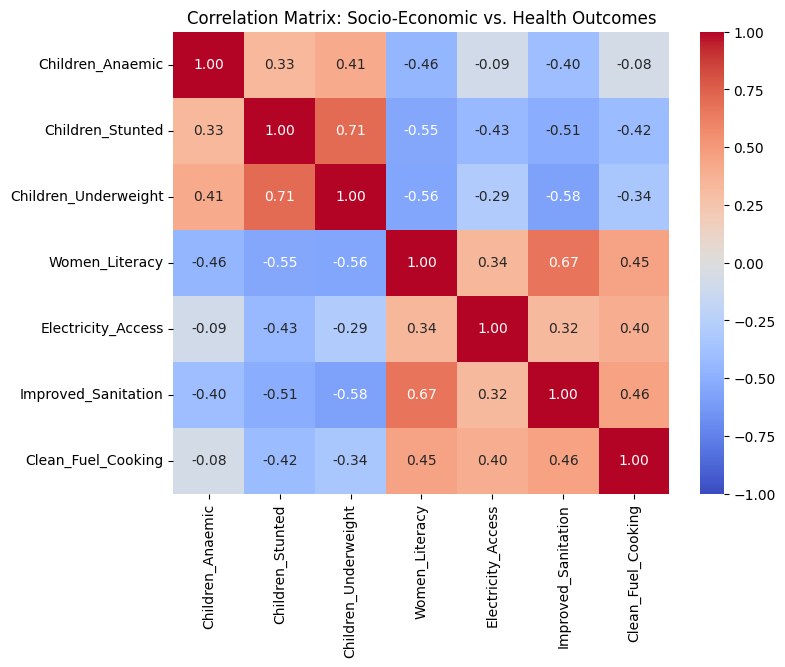

In [ ]:
cols = [
    'Children_Anaemic', 'Children_Stunted', 'Children_Underweight',
    'Women_Literacy', 'Electricity_Access', 'Improved_Sanitation', 'Clean_Fuel_Cooking'
]
corr = df[cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix: Socio-Economic vs. Health Outcomes")
plt.show()

In [ ]:
summary = df[cols].describe().T[['mean','std','min','max']]
print(summary)

                           mean        std   min    max
Children_Anaemic      65.853333  12.045094  24.9   95.5
Children_Stunted      33.518865   8.448023  13.2   60.6
Children_Underweight  29.513617   9.718220   7.2   62.4
Women_Literacy        74.354184  12.244727  38.6   99.7
Electricity_Access    96.994043   4.355566  68.4  100.0
Improved_Sanitation   71.934894  14.299093  29.2   99.9
Clean_Fuel_Cooking    54.148936  24.187817   8.6   99.8
